# Text Analysis with NLTK and Gensim

To install the packages in Jupyter Notebook, run the lines **!pip3 install nltk**, **!pip3 install gensim**, and **!pip3 install afinn**

In [50]:
!pip install nltk
!pip install gensim
!pip install afinn


  Using cached https://files.pythonhosted.org/packages/bc/e8/cab8479b25297b3847cfb55e85a5014e8c53b80e513eaf1ba58c7b3a6acd/wordcloud-1.4.1.tar.gz
  Running setup.py bdist_wheel for WordCloud: started
  Running setup.py bdist_wheel for WordCloud: finished with status 'error'
  Complete output from command c:\users\lk6me\appdata\local\continuum\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\lk6me\\AppData\\Local\\Temp\\pip-install-7zt3rqfd\\WordCloud\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\lk6me\AppData\Local\Temp\pip-wheel-7o9vkdg3 --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.6
  creating build\lib.win-amd64-3.6\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.6\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3

  Failed building wheel for WordCloud
Command "c:\users\lk6me\appdata\local\continuum\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\lk6me\\AppData\\Local\\Temp\\pip-install-7zt3rqfd\\WordCloud\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\lk6me\AppData\Local\Temp\pip-record-3bksig39\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\lk6me\AppData\Local\Temp\pip-install-7zt3rqfd\WordCloud\


In [42]:
import nltk
import gensim


# documents for our corpus:
trump = open("TrumpInaguration.txt", "r", encoding="utf8")
obama = open("ObamaInaguration.txt", "r")
wbush = open("WBushInaguration.txt", "r")
clinton = open("ClintonInaguration.txt", "r")
bush = open("BushInaguration.txt", "r")

all_docs = [trump, obama, wbush, clinton, bush]

# read in all of the documents and put them together
corpus = []
for doc in all_docs:
    corpus.append(doc.read())
    
print(corpus)

["Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: thank you.\nWe, the citizens of America, are now joined in a great national effort to rebuild our country and to restore its promise for all of our people.\nTogether, we will determine the course of America and the world for years to come.\nWe will face challenges. We will confront hardships. But we will get the job done.\nEvery four years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent.\nToday’s ceremony, however, has very special meaning. Because today we are not merely transferring power from one Administration to another, or from one party to another – but we are transferring power from Washington, D.C. and giving it back to you, the American People.\nFor too long, a 

# Cleaning and Preprocessing Text

In [43]:
from gensim.utils import tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# set of all of stop words
stop_words = set(stopwords.words('english'))
# set of punctuation 
punctuation = set(string.punctuation)

# stemmer object
stemmer = PorterStemmer()

def clean(doc):
    # Remove stop words
    stop_free = ' '.join([term for term in doc.lower().split() if term not in stop_words])
    
    # Remove punctuation
    punc_free = ''.join(term for term in stop_free if term not in punctuation)
    
    # Stem each word
    stemmed = ' '.join(stemmer.stem(word) for word in punc_free.split())
    
    return stemmed

# clean every document in the corpus
clean_corpus = [clean(doc).split() for doc in corpus]

print(len(clean_corpus[1]))

1180


# Word Frequencies

In [44]:
all_words = []
for doc in clean_corpus:
    all_words += doc

# define "word_frequencies" as the frequencies of all of the words in "all_words"
word_frequencies = nltk.FreqDist(all_words)
# print the 20 most common words
print(word_frequencies.most_common(20))


# put it in a data frame
import pandas as pd

# Make data frame from dictionary
term_df = pd.DataFrame({'count':list(word_frequencies.values())}, index = word_frequencies.keys())
# sort the values so that the terms with the highest counts are at the top
term_df.sort_values('count', ascending = False, inplace = True)
term_df.head()

[('america', 64), ('us', 63), ('nation', 56), ('american', 47), ('world', 46), ('new', 45), ('must', 44), ('peopl', 37), ('work', 31), ('time', 31), ('today', 29), ('countri', 27), ('everi', 25), ('great', 24), ('make', 23), ('gener', 22), ('citizen', 21), ('power', 21), ('govern', 21), ('let', 21)]


,count
america,64
us,63
nation,56
american,47
world,46


# Part of Speech Tagging

In [45]:
# get a part of speech pair for each term in the index of term_df
tagged = nltk.pos_tag(term_df.index)

print(tagged[0:20]) # print the first 20

# Put the words and parts of speech in a dataframe
terms = []
tags = []
for pair in tagged:
    terms.append(pair[0])
    tags.append(pair[1])

pos_df = pd.DataFrame({'POS': tags}, index = terms)
pos_df.head()

[('america', 'JJ'), ('us', 'PRP'), ('nation', 'NN'), ('american', 'JJ'), ('world', 'NN'), ('new', 'JJ'), ('must', 'MD'), ('peopl', 'VB'), ('work', 'NN'), ('time', 'NN'), ('today', 'NN'), ('countri', 'VBP'), ('everi', 'RB'), ('great', 'JJ'), ('make', 'VBP'), ('gener', 'JJ'), ('power', 'NN'), ('let', 'NN'), ('citizen', 'JJ'), ('govern', 'JJ')]


,POS
america,JJ
us,PRP
nation,NN
american,JJ
world,NN


### part of speech tags:

CC - coordinating conjunction<br>
CD - cardinal digit<br>
DT - determiner<br>
EX - existential there (like: "there is" ... think of it like "there exists")<br>
FW - foreign word<br>
IN - preposition/subordinating conjunction<br>
JJ - adjective	'big'<br>
JJR - adjective, comparative	'bigger'<br>
JJS - adjective, superlative	'biggest'<br>
LS - list marker	1)<br>
MD - modal	could, will<br>
NN - noun, singular 'desk'<br>
NNS - noun plural	'desks'<br>
NNP - proper noun, singular	'Harrison'<br>
NNPS - proper noun, plural	'Americans'<br>
PDT - predeterminer	'all the kids'<br>
POS - possessive ending	parent's<br>
PRP - personal pronoun	I, he, she<br>
PRP\$ - possessive pronoun	my, his, hers<br>
RB - adverb	very, silently<br>
RBR - adverb, comparative	better<br>
RBS - adverb, superlative	best<br>
RP - particle	give up<br>
TO - to	go 'to' the store.<br>
UH - interjection	errrrrrrrm<br>
VB - verb, base form	take<br>
VBD - verb, past tense	took<br>
VBG - verb, gerund/present participle	taking<br>
VBN - verb, past participle	taken<br>
VBP - verb, sing. present, non-3d	take<br>
VBZ - verb, 3rd person sing. present	takes<br>
WDT - wh-determiner	which<br>
WP - wh-pronoun	who, what<br>
WP$ - possessive wh-pronoun	whose<br>
WRB - wh-abverb	where, when

In [46]:
# combine the dataframes
df = pd.concat([term_df, pos_df], axis = 1)
df.head()

,count,POS
america,64,JJ
us,63,PRP
nation,56,NN
american,47,JJ
world,46,NN


### Sentiment

In [47]:
from afinn import Afinn

# make an afinn object
afinn = Afinn()

# get sentiment for each document in the corpus 
# (unclean corpus because the clean one has some words the algorithm won't recognize)
titles = ['trump', 'obama', 'wbush', 'clinton', 'bush']
for i in range(len(corpus)):
    print(titles[i] + ' sentiment score:', afinn.score(corpus[i]))

trump sentiment score: 139.0
obama sentiment score: 81.0
wbush sentiment score: 120.0
clinton sentiment score: 77.0
bush sentiment score: 258.0


# Topic Modeling using Latent Dirichlet Allocation

![](LDA-concept.png)

### Preparing a Document-Term Matrix

### A Few Ways to Visualize

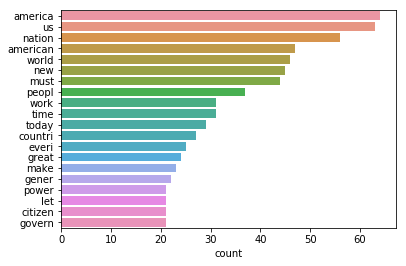

In [48]:
# plot of the most frequent words

import matplotlib.pyplot as plt
import seaborn as sns

top20 = df.iloc[:20]
sns.barplot(x = top20['count'], y = top20.index)
plt.show()

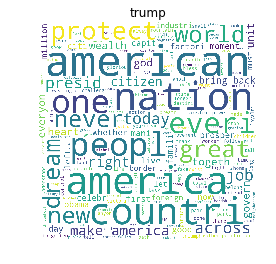

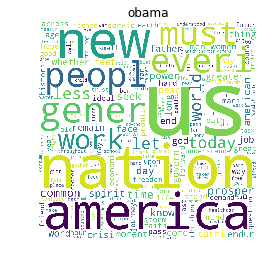

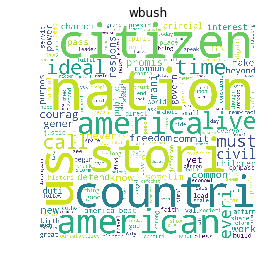

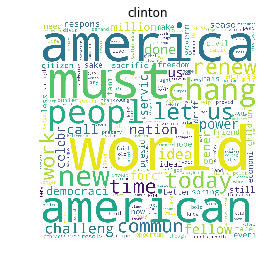

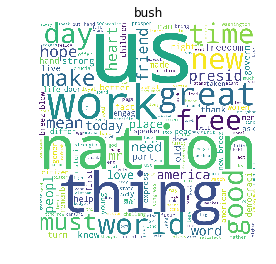

In [53]:
# make a word cloud
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# make a word cloud for each document in the corpus
titles = ['trump', 'obama', 'wbush', 'clinton', 'bush']
for i in range(len(clean_corpus)):
    # generate a wordcloud object
    wordcloud = WordCloud(width = 1000, height = 1000, background_color='white').generate(' '.join(clean_corpus[i]))
    plt.imshow(wordcloud)
    plt.title(titles[i])
    plt.axis("off")
    plt.show()

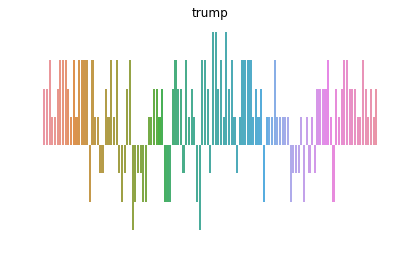

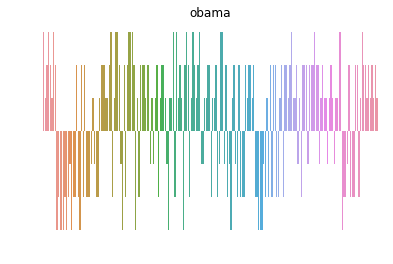

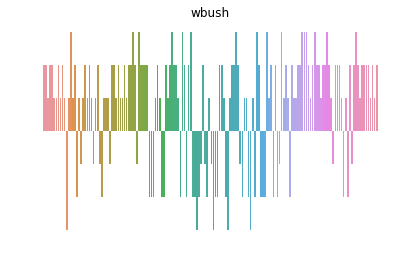

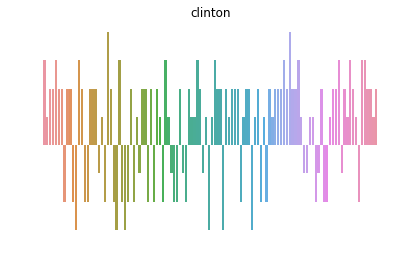

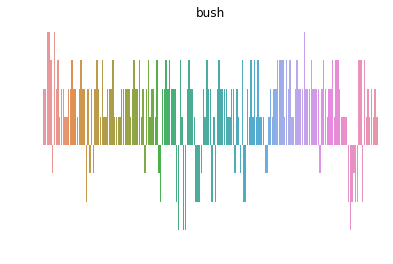

In [54]:
def clean_wo_stem(doc):
    # Remove stop words
    stop_free = ' '.join([term for term in doc.lower().split() if term not in stop_words])
    
    # Remove punctuation
    punc_free = ''.join(term for term in stop_free if term not in punctuation)
    
    return punc_free

clean_wo_stem_corpus = [clean_wo_stem(doc).split() for doc in corpus]

for i in range(len(clean_wo_stem_corpus)):
    temp = pd.DataFrame({'scores':afinn.scores_with_pattern(' '.join(clean_wo_stem_corpus[i]))})
    sns.barplot(x = temp.index, y = temp['scores'])
    plt.title(titles[i])
    plt.axis('off')
    plt.show()
#     print(afinn.scores_with_pattern(' '.join(doc)))

In [55]:
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(clean_corpus)
#print(dictionary.token2id)

Here we assigned a unique integer id to all words appearing in the corpus with the gensim.corpora.dictionary.Dictionary class. This sweeps across the texts, collecting word counts and relevant statistics. In the end, we see there are 1560 distinct words in the processed corpus, which means each document will be represented by 1560 numbers (ie., by a 1560-Dimensional vector). To see the mapping between words and their ids, uncomment the "print(dictionary.token2id)" line.

To actually convert tokenized documents to vectors:

In [56]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
dtm = [dictionary.doc2bow(doc) for doc in clean_corpus]
print(dtm)

[[(0, 1), (1, 1), (2, 1), (3, 5), (4, 2), (5, 1), (6, 1), (7, 9), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 18), (17, 16), (18, 2), (19, 2), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 6), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 3), (44, 2), (45, 2), (46, 1), (47, 4), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 3), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 2), (67, 3), (68, 4), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 2), (81, 1), (82, 1), (83, 12), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 3), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110,

The function doc2bow() simply counts the number of occurrences of each distinct word, converts the word to its integer word id and returns the result as a sparse vector. To view the vectors, uncomment the line "print(dtm)"

### Creating the LDA Model

In [57]:
from gensim.models.ldamodel import LdaModel

# Creating the object for LDA model using gensim library
Lda = LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(dtm, num_topics=20, id2word = dictionary, passes=100)

# print out the topics
for topic in ldamodel.show_topics(num_topics = -1, num_words = 5):
    print(topic, '\n')

(0, '0.001*"world" + 0.001*"america" + 0.001*"us" + 0.001*"nation" + 0.001*"must"') 

(1, '0.001*"us" + 0.001*"new" + 0.001*"world" + 0.001*"work" + 0.001*"nation"') 

(2, '0.001*"world" + 0.001*"us" + 0.001*"must" + 0.001*"america" + 0.001*"nation"') 

(3, '0.001*"america" + 0.001*"nation" + 0.001*"world" + 0.001*"encourag" + 0.001*"enterpris"') 

(4, '0.001*"us" + 0.001*"america" + 0.001*"world" + 0.001*"must" + 0.001*"nation"') 

(5, '0.001*"us" + 0.001*"america" + 0.001*"nation" + 0.001*"new" + 0.001*"must"') 

(6, '0.001*"us" + 0.001*"nation" + 0.001*"america" + 0.001*"american" + 0.001*"new"') 

(7, '0.001*"world" + 0.001*"america" + 0.001*"american" + 0.001*"must" + 0.001*"new"') 

(8, '0.024*"america" + 0.022*"american" + 0.017*"countri" + 0.017*"–" + 0.014*"again"') 

(9, '0.001*"us" + 0.001*"nation" + 0.001*"america" + 0.001*"must" + 0.001*"world"') 

(10, '0.001*"us" + 0.001*"nation" + 0.001*"peopl" + 0.001*"countri" + 0.001*"american"') 

(11, '0.018*"us" + 0.012*"nation" +

The numbers in the topics are the probability that each word is in the topic.

#### Here is a simple example of how it works:

Suppose you have the following corpus:

* I ate a banana and spinach smoothie for breakfast
* I like to eat broccoli and bananas.
* Chinchillas and kittens are cute.
* My sister adopted a kitten yesterday.
* Look at this cute hamster munching on a piece of broccoli.

Latent Dirichlet allocation is a way of automatically discovering topics that these sentences contain. For example, given these sentences and asked for 2 topics, LDA might produce something like

* Sentences 1 and 2: 100% Topic A
* Sentences 3 and 4: 100% Topic B
* Sentence 5: 60% Topic A, 40% Topic B
* Topic A: 30% broccoli, 15% bananas, 10% breakfast, 10% munching, ... (at which point, you could interpret topic A to be about food)
* Topic B: 20% chinchillas, 20% kittens, 20% cute, 15% hamster, ... (at which point, you could interpret topic B to be about cute animals)

# References

https://radimrehurek.com/topic_modeling_tutorial/2%20-%20Topic%20Modeling.html

https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

https://medium.com/towards-data-science/word-to-vectors-natural-language-processing-b253dd0b0817

https://www.digitalocean.com/community/tutorials/how-to-work-with-language-data-in-python-3-using-the-natural-language-toolkit-nltk

https://radimrehurek.com/gensim/tut1.html

https://radimrehurek.com/gensim/tutorial.html#first-example

https://amueller.github.io/word_cloud/auto_examples/simple.html

https://www.quora.com/What-is-a-good-explanation-of-Latent-Dirichlet-Allocation